# Métricas de avaliação no aprendizado não supervisionado
- "Avaliar o desempenho de um algoritmo de agrupamento **não é tão trivial** quanto contar o número de erros ou a precisão e recuperação de um algoritmo de classificação supervisionado." 
    - "Em particular, qualquer métrica de avaliação **não deve levar em consideração os valores absolutos dos rótulos do cluster**, mas sim se esse agrupamento definir separações dos dados semelhantes a algum conjunto de classes de verdade básica ou satisfazer alguma suposição de que os **membros pertencem à mesma classe são mais semelhantes do que membros de classes diferentes de acordo com alguma métrica de similaridade**."

<a id='kmeans'></a>
- Importando o dataset iris
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [1]:
# Importando o dataset iris
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True,as_frame=True)

In [2]:
# Selecionando apenas as colunas de pétala
X_iris = X[['petal length (cm)','petal width (cm)']]

- **Visualizando graficamente os pontos**
    - https://matplotlib.org/stable/plot_types/basic/scatter_plot.html#sphx-glr-plot-types-basic-scatter-plot-py

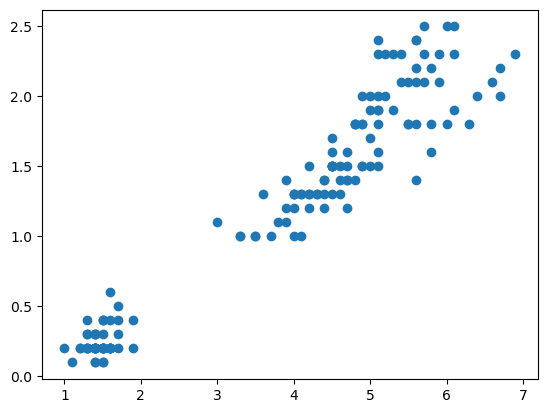

In [3]:
# Plotando o gráfico com esses dados
import matplotlib.pyplot as plt

# plot
fig, ax = plt.subplots()

ax.scatter(X_iris['petal length (cm)'], X_iris['petal width (cm)'])

plt.show()

- **Utilizando o K-means**
    - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [4]:
# Importando o KMeans
from sklearn.cluster import KMeans

In [5]:
# Utilizando o algoritmo
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_iris)

In [6]:
# Verificando quais foram os labels determinados pelo k-means
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

- **Quando temos os rótulos dos dados, podemos comparar os clusters gerados com os valores esperados (target)**

In [7]:
# Criando um DataFrame já com os labels gerados acima
import pandas as pd
iris = pd.concat([X,y],axis=1)
iris['labels'] = kmeans.labels_
iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,labels
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0


In [8]:
# Verificando a relação entre target e labels
iris[['target','labels']].value_counts()

target  labels
0       0         50
1       2         48
2       1         46
        2          4
1       1          2
dtype: int64

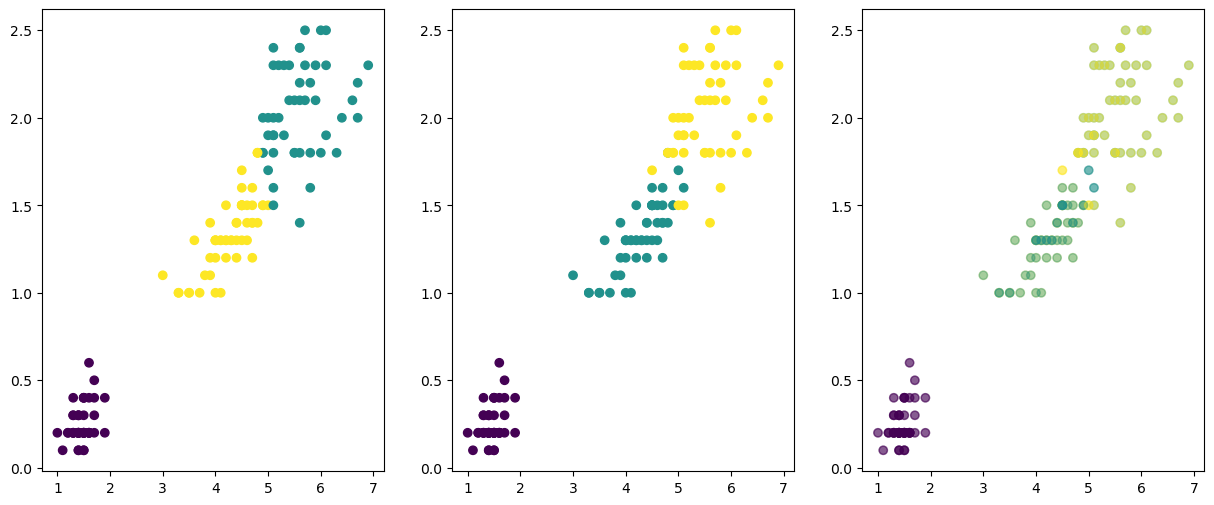

In [9]:
# Visualizando graficamente essa informação
fig, ax = plt.subplots(ncols=3,figsize=(15,6))

ax[0].scatter(X_iris['petal length (cm)'], X_iris['petal width (cm)'],c=iris.labels)
ax[1].scatter(X_iris['petal length (cm)'], X_iris['petal width (cm)'],c=iris.target)
ax[2].scatter(X_iris['petal length (cm)'], X_iris['petal width (cm)'],c=iris.labels,alpha=0.4)
ax[2].scatter(X_iris['petal length (cm)'], X_iris['petal width (cm)'],c=iris.target,alpha=0.4)

plt.show()

In [10]:
# Criando uma função para mudar esses números por letras
def numero_letra(valor):
    lista = ['A','B','C']
    return lista[valor]

In [11]:
# Aplicando a função
iris['grupos'] = iris.labels.apply(numero_letra)

In [12]:
# Agora novamente visualizando a relação entre os grupos e os targets
resultados_k3 = iris[['target','grupos']].value_counts().reset_index(name='cont')

In [13]:
# Transformando esses dados em uma tabela
tabela_k3 = resultados_k3.pivot_table(index='target',columns='grupos',values='cont',fill_value=0).rename_axis(index=None,columns=None)

In [14]:
# Visualizando essa tabela
tabela_k3

,A,B,C
0,50,0,0
1,0,2,48
2,0,46,4


In [15]:
# Vamos começar analisando a tabela para k = 3 e utilizando o target mais 
# presente no cluster como previsão para aquele cluster
classes_k3 = tabela_k3.idxmax().reset_index()
classes_k3.columns = ['grupos','y_pred']
classes_k3

,grupos,y_pred
0,A,0
1,B,2
2,C,1


In [16]:
# Podemos criar uma tabela unindo as classes com o nosso dataset original
merge_k3 = pd.merge(
                iris,
                classes_k3,
                how='left',
                on='grupos')

In [17]:
# E então verificar a relação entre y_true e y_pred
merge_k3[['target','y_pred']].value_counts()

target  y_pred
0       0         50
1       1         48
2       2         46
        1          4
1       2          2
dtype: int64

In [18]:
# Importando o metrics do sklearn
from sklearn import metrics

In [19]:
# E avaliando a matriz de confusão
metrics.confusion_matrix(merge_k3.target,merge_k3.y_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  4, 46]])

In [20]:
# A acurácia
metrics.accuracy_score(merge_k3.target,merge_k3.y_pred)

0.96

In [21]:
# precisão
metrics.precision_score(merge_k3.target,merge_k3.y_pred,average='macro')

0.9604700854700855

In [22]:
# e recall
metrics.recall_score(merge_k3.target,merge_k3.y_pred,average='macro')

0.96

- **Podemos fazer o mesmo processo para k = 2 e comparar o resultado**

In [23]:
# Utilizando o algoritmo
kmeans_k2 = KMeans(n_clusters=2, random_state=0).fit(X_iris)

In [24]:
# Criando um DataFrame já com os labels gerados acima
iris = pd.concat([X,y],axis=1)
iris['labels'] = kmeans_k2.labels_
iris.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,labels
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0


In [25]:
# Verificando a relação entre target e labels
iris[['target','labels']].value_counts()

target  labels
0       0         50
2       1         50
1       1         49
        0          1
dtype: int64

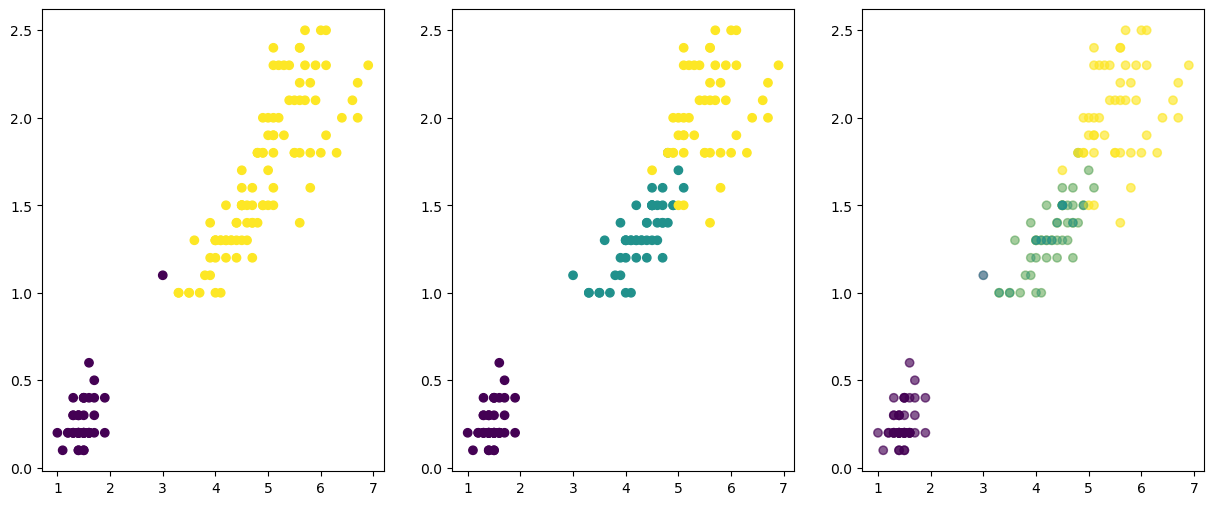

In [26]:
# Visualizando graficamente essa informação
fig, ax = plt.subplots(ncols=3,figsize=(15,6))

ax[0].scatter(X_iris['petal length (cm)'], X_iris['petal width (cm)'],c=iris.labels)
ax[1].scatter(X_iris['petal length (cm)'], X_iris['petal width (cm)'],c=iris.target)
ax[2].scatter(X_iris['petal length (cm)'], X_iris['petal width (cm)'],c=iris.labels,alpha=0.4)
ax[2].scatter(X_iris['petal length (cm)'], X_iris['petal width (cm)'],c=iris.target,alpha=0.4)

plt.show()

In [27]:
# Aplicando a função
iris['grupos'] = iris.labels.apply(numero_letra)

In [28]:
# Agora novamente visualizando a relação entre os grupos e os targets
iris[['target','grupos']].value_counts()

target  grupos
0       A         50
2       B         50
1       B         49
        A          1
dtype: int64

In [29]:
# Transformando esses dados em uma tabela
resultados_k2 = iris[['target','grupos']].value_counts().reset_index(name='cont')
tabela_k2 = resultados_k2.pivot_table(index='target',columns='grupos',values='cont',fill_value=0).rename_axis(index=None,columns=None)

In [30]:
# Visualizando essa tabela
tabela_k2

,A,B
0,50,0
1,1,49
2,0,50


In [31]:
# Vamos analisar para k=2
classes_k2 = tabela_k2.idxmax().reset_index()
classes_k2.columns = ['grupos','y_pred']
classes_k2

,grupos,y_pred
0,A,0
1,B,2


In [32]:
# Podemos criar uma tabela unindo as classes com o nosso dataset original
merge_k2 = pd.merge(
                iris,
                classes_k2,
                how='left',
                on='grupos')

In [33]:
# E então verificar a relação entre y_true e y_pred
merge_k2[['target','y_pred']].value_counts()

target  y_pred
0       0         50
2       2         50
1       2         49
        0          1
dtype: int64

In [34]:
# E avaliando a matriz de confusão
metrics.confusion_matrix(merge_k2.target,merge_k2.y_pred)

array([[50,  0,  0],
       [ 1,  0, 49],
       [ 0,  0, 50]])

In [35]:
# A acurácia
metrics.accuracy_score(merge_k2.target,merge_k2.y_pred)

0.6666666666666666

In [36]:
# precisão
metrics.precision_score(merge_k2.target,merge_k2.y_pred,average='macro')

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.4951475539710834

In [37]:
# e recall
metrics.recall_score(merge_k2.target,merge_k2.y_pred,average='macro')

0.6666666666666666

- **Métricas para avaliação de clusterizações**
    - https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

- **1. Índice Rand**
    - https://scikit-learn.org/stable/modules/clustering.html#rand-index
    - mede a semelhança de classe e cluster entre os pares de pontos
    - **Depende de termos os rótulos / labels**
    - A [fórmula é dada por](https://en.wikipedia.org/wiki/Rand_index):
        <img src="https://drive.google.com/uc?id=1_eGU36rS0OTEaZ6JvckTcm2dZb-fmJaG" style='width: 250px;' />
    - Onde:
        - a: número de pares que pertencem **a mesma classe e ao mesmo cluster**
        - b: número de pares que pertencem **a classes diferentes e a clusters diferentes**
        - c: número de pares que pertencem **a mesma classe e a clusters diferentes**
        - d: número de pares que pertencem **a classes diferentes e ao mesmo cluster**

In [38]:
# Considerando os mesmos dados que utilizamos no início desse módulo
dados = pd.DataFrame({
     'x': [1,2,3,2,7,8,6,7],
     'y': [2,1,2,3,6,6,7,8],
     'target': [0,0,0,1,1,1,0,1]
 })

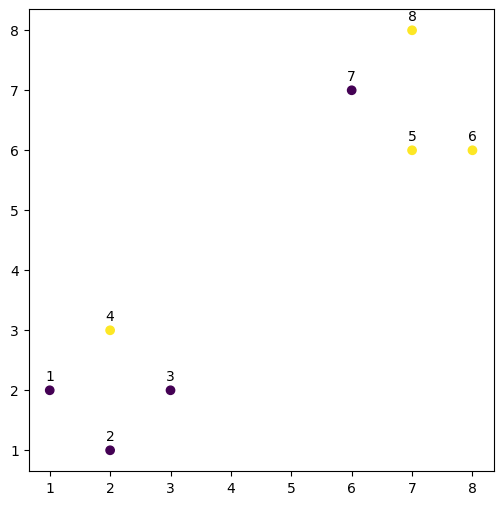

In [39]:
# Podemos exibir esses dados
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(dados.x,dados.y,c=dados.target)

for i in range(0,len(dados)):
    ax.annotate(i+1,(dados.x[i],dados.y[i]),
                ha='center',
                xytext=(0,7),
                textcoords='offset points'
               )

plt.show()

In [40]:
# Criando um novo X para esses dados
X_dados = dados[['x','y']]

In [41]:
# E utilizando o kmeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_dados)

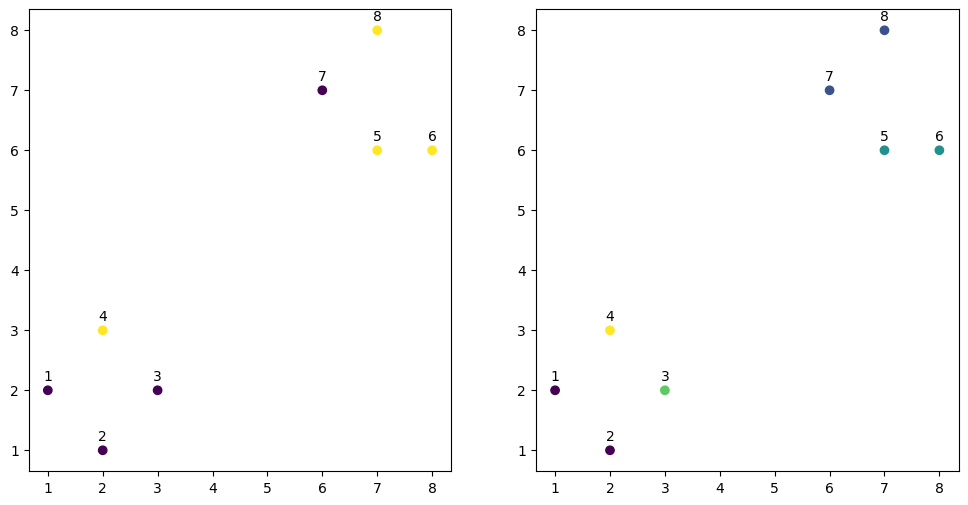

In [42]:
# Podemos visualizar a classificação desses pontos
fig, ax = plt.subplots(ncols=2,figsize=(12,6))

ax[0].scatter(dados.x,dados.y,c=dados.target)
ax[1].scatter(dados.x,dados.y,c=kmeans.labels_)

for i in range(0,len(dados)):
    ax[0].annotate(i+1,(dados.x[i],dados.y[i]),
                ha='center',
                xytext=(0,7),
                textcoords='offset points'
               )
    ax[1].annotate(i+1,(dados.x[i],dados.y[i]),
                ha='center',
                xytext=(0,7),
                textcoords='offset points'
               )
    
plt.show()

- Vamos avaliar esses pares:
    - par 1 e 2: pertencem a mesma classe e ao mesmo cluster -> a
    - par 1 e 3: também -> a
    - par 1 e 4: pertencem a classes diferentes mas ao mesmo cluster  -> d
    - par 4 e 7: pertencem a classes diferentes e a clusters diferentes -> b
- Classificando todos os pares:
    - a = 6 (número de pares que pertencem a mesma classe e ao mesmo cluster)
        - 1-2,1-3,2-3,5-6,5-8,6-8
    - b = 10 (número de pares que pertencem a classes diferentes e a clusters diferentes)
        - 1-5,1-6,1-8,2-5,2-6,2-8,3-5,3-6,3-8,4-7
    - c =  6 (número de pares que pertencem a mesma classe e a clusters diferentes)
        - 1-7,2-7,3-7,4-5,4-6,4-8
    - d = 6 (número de pares que pertencem a classes diferentes e ao mesmo cluster)
        - 1-4,2-4,3-4,5-7,6-7,7-8

In [43]:
# Calculando o RI
# RI = (a+b)/(a+b+c+d)
(6+10)/(6+10+6+6)

0.5714285714285714

In [44]:
# Agora utilizando o rand_score do sklearn
metrics.rand_score(dados.target,kmeans.labels_)

0.6071428571428571

- **Porém o índice rand tem alguns problemas como ter valores altos mesmos para dados aleatórios e aumentar a medida que aumentamos o número de grupos**
- **Para resolver podemos usar o `adjusted_rand_score`**
    - Para uma clusterização aleatória, seu valor é 0
    - O máximo é 1
    - Valores negativos representam clusterizações piores que escolher de forma aleatória os clusters

In [45]:
# Testando diferentes valores de k
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_dados)

In [46]:
# RI
metrics.rand_score(dados.target,kmeans.labels_)

0.5714285714285714

In [47]:
# ARI (Índice Rand Ajustado)
metrics.adjusted_rand_score(dados.target,kmeans.labels_)

0.045454545454545456

In [48]:
# Calculando os dois índices para diferentes valores de k
valores_k = []
RI = [] 
ARI = []

for i in range(1,9):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_dados)
    valores_k.append(i)
    RI.append(metrics.rand_score(dados.target,kmeans.labels_))
    ARI.append(metrics.adjusted_rand_score(dados.target,kmeans.labels_))

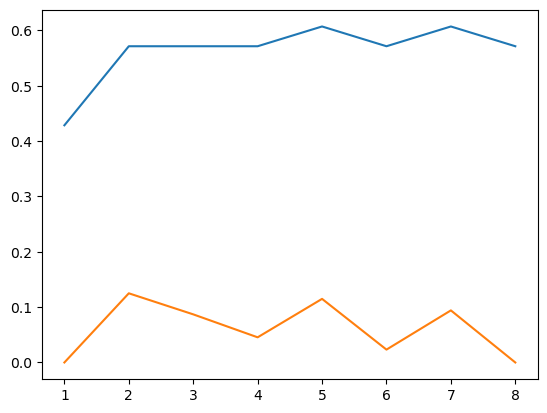

In [49]:
# Verificando graficamente
fig, ax = plt.subplots()

ax.plot(valores_k,RI)
ax.plot(valores_k,ARI)

plt.show()

- **Podemos usar o rand score e o rand score ajustado para o dataset iris**

In [50]:
merge_k2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,labels,grupos,y_pred
0,5.1,3.5,1.4,0.2,0,0,A,0
1,4.9,3.0,1.4,0.2,0,0,A,0
2,4.7,3.2,1.3,0.2,0,0,A,0
3,4.6,3.1,1.5,0.2,0,0,A,0
4,5.0,3.6,1.4,0.2,0,0,A,0
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1,B,2
146,6.3,2.5,5.0,1.9,2,1,B,2
147,6.5,3.0,5.2,2.0,2,1,B,2
148,6.2,3.4,5.4,2.3,2,1,B,2


In [51]:
# Calculando o rand_score para o dataset iris utilizando o y_pred
metrics.rand_score(merge_k2.target,merge_k2.y_pred)

0.7719015659955257

In [52]:
# Calculando o rand_score AJUSTADO para o dataset iris utilizando o y_pred
metrics.adjusted_rand_score(merge_k2.target,merge_k2.y_pred)

0.5583714437541352

In [53]:
# Agora utilizando os labels para o rand_score
metrics.rand_score(merge_k2.target,kmeans_k2.labels_)

0.7719015659955257

In [54]:
metrics.rand_score(merge_k2.target,merge_k2.y_pred) == metrics.rand_score(merge_k2.target,kmeans_k2.labels_)

True

In [55]:
# E os labels para o rand_score ajustado
metrics.adjusted_rand_score(merge_k2.target,merge_k2.labels)

0.5583714437541352

In [56]:
# Calculando para diferentes valores de K no dataset iris
valores_k = []
RI = [] 
ARI = []

for i in range(1,9):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_iris)
    valores_k.append(i)
    RI.append(metrics.rand_score(y,kmeans.labels_))
    ARI.append(metrics.adjusted_rand_score(y,kmeans.labels_))

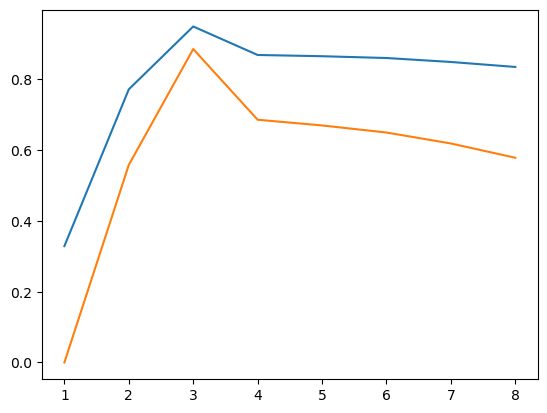

In [57]:
# E então visualizando graficamente
fig, ax = plt.subplots()

ax.plot(valores_k,RI)
ax.plot(valores_k,ARI)

plt.show()

- **2. Medida V**
    - https://scikit-learn.org/stable/modules/clustering.html#homogeneity-completeness-and-v-measure
    - Analisa 2 informações em relação aos dados (que variam de 0 a 1):
        - homogeneidade: cada cluster possui apenas membros de uma única classe
        - completude: todos os membros de uma classe estão no mesmo cluster
    - **Depende dos rótulos**
    - Para amostras pequenas ou um número grande de clusters, é mais seguro usar um índice ajustado como o rand ajustado (visto acima)
    - A medida V será dada pela média harmônica entre a homogeneidade e a completude
        - Sendo **beta (default=1) a razão entre o peso atribuído a homogeneidade x completude**
        <img src="https://drive.google.com/uc?id=1RPW0UU6840jIWHrEUYMSUKy69Q6O7HbG" style='width: 350px;' />

In [58]:
# Considerando esse mesmo DataFrame
dados = pd.DataFrame({
     'x': [1,2,3,2,7,8,6,7],
     'y': [2,1,2,3,6,6,7,8],
     'target': [0,0,0,1,1,1,0,1]
 })

X_dados = dados[['x','y']]

In [59]:
# Testando diferentes valores de k
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_dados)

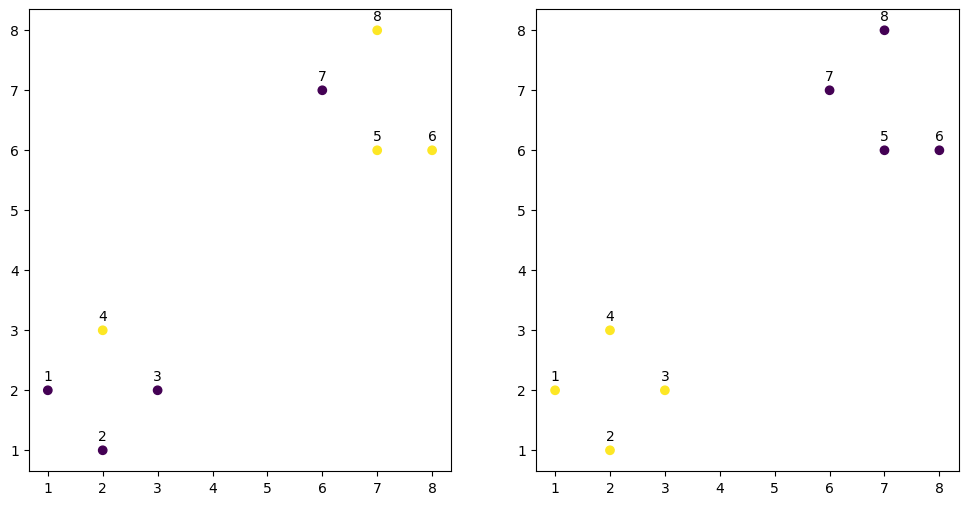

In [60]:
# Visualizando 
fig, ax = plt.subplots(ncols=2,figsize=(12,6))

ax[0].scatter(dados.x,dados.y,c=dados.target)
ax[1].scatter(dados.x,dados.y,c=kmeans.labels_)

for i in range(0,len(dados)):
    ax[0].annotate(i+1,(dados.x[i],dados.y[i]),
                ha='center',
                xytext=(0,7),
                textcoords='offset points'
               )
    ax[1].annotate(i+1,(dados.x[i],dados.y[i]),
                ha='center',
                xytext=(0,7),
                textcoords='offset points'
               )
    
plt.show()

In [61]:
# Calculando a homogeneidade
metrics.homogeneity_score(dados.target,kmeans.labels_)

0.18872187554086706

In [62]:
# a completude
metrics.completeness_score(dados.target,kmeans.labels_)

0.18872187554086706

In [63]:
# e a medida v
metrics.v_measure_score(dados.target,kmeans.labels_)

0.18872187554086706

- **Podemos alterar os targets e visualizar como seriam esses parâmetros**

In [64]:
# Calculando os 3 indicadores em relação a k
valores_k = []
h = [] 
c = []
v = []

for i in range(1,9):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_dados)
    valores_k.append(i)
    h.append(metrics.homogeneity_score(dados.target,kmeans.labels_))
    c.append(metrics.completeness_score(dados.target,kmeans.labels_))
    v.append(metrics.v_measure_score(dados.target,kmeans.labels_))

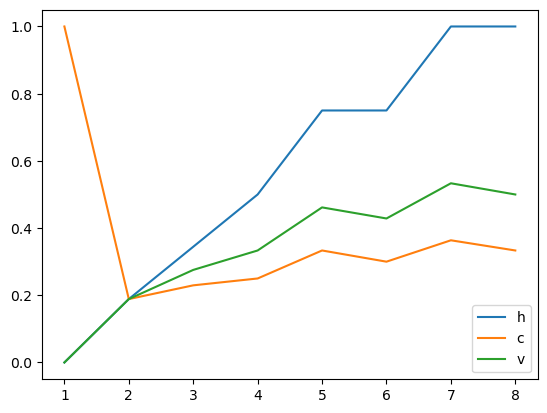

In [65]:
# E então visualizando graficamente
fig, ax = plt.subplots()

ax.plot(valores_k,h,label='h')
ax.plot(valores_k,c,label='c')
ax.plot(valores_k,v,label='v')

ax.legend()

plt.show()

- **Também podemos fazer o mesmo com o dataset iris**

In [66]:
# Visualizando a tabela que vimos acima
tabela_k2

,A,B
0,50,0
1,1,49
2,0,50


- Quando falamos de homogeneidade estamos falando das colunas, e quando falamos de completude estamos falando das linhas

In [67]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_iris)

In [68]:
# Calculando a homogeneidade para essa tabela acima
metrics.homogeneity_score(y,kmeans.labels_)

0.5537492887432671

In [69]:
# Calculando também a completude
metrics.completeness_score(y,kmeans.labels_)

0.9490204434010505

In [70]:
# E a medida V
metrics.v_measure_score(y,kmeans.labels_)

0.6994010915914345

In [71]:
# Criando o gráfico dos 3 indicadores em relação a k
valores_k = []
h = [] 
c = []
v = []

for i in range(1,9):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_iris)
    valores_k.append(i)
    h.append(metrics.homogeneity_score(y,kmeans.labels_))
    c.append(metrics.completeness_score(y,kmeans.labels_))
    v.append(metrics.v_measure_score(y,kmeans.labels_))

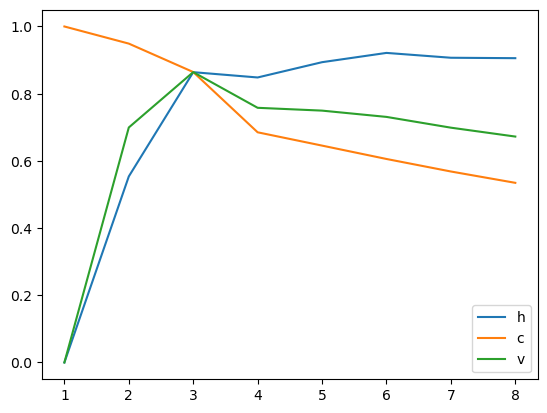

In [72]:
# Visualizando graficamente
fig, ax = plt.subplots()

ax.plot(valores_k,h,label='h')
ax.plot(valores_k,c,label='c')
ax.plot(valores_k,v,label='v')

ax.legend()

plt.show()

- **3. Inércia (soma dos erros ao quadrado)**
    - mesma métrica que usamos no método do cotovelo
    - aumenta com o aumento de k
    - **Independe dos rótulos**

In [73]:
# Criando o gráfico de inércia que vimos nas aulas anteriores
valores_k = []
inercia = [] 

for i in range(1,9):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_dados)
    valores_k.append(i)
    inercia.append(kmeans.inertia_)

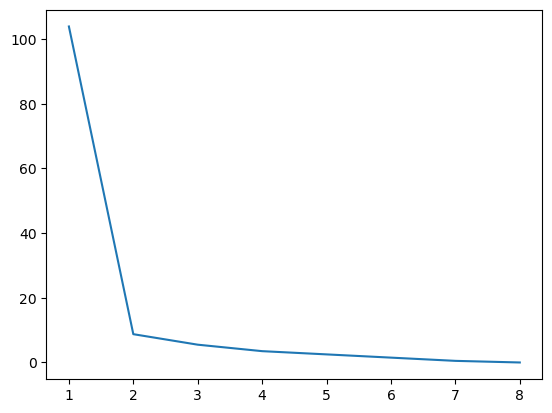

In [74]:
# Visualizando o gráfico de inércia x K
fig, ax = plt.subplots()

ax.plot(valores_k,inercia)

plt.show()

- **4. "Coeficiente Silhueta"**
    - https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient
    - Quanto maior esse coeficiente, mais bem definidos são os clusters do modelo
    - Vamos considerar 2 pontuações
        - **a:** A distância média **entre uma amostra e todos os outros pontos do mesmo cluster**
        - **b:** A distância média **entre uma amostra e todos os outros pontos no outro cluster mais próximo**
    - **Ele avalia tanto a distância intracluster (o quanto os pontos estão afastados dentro do próprio cluster) quando a distância interclusters (o quanto os clusters estão afastados entre si)**
    - O [coeficiente para uma amostra é dado pela fórmula abaixo](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html#sklearn.metrics.silhouette_samples)
    <img src="https://drive.google.com/uc?id=1iW9amVJNfL9qpLd6swEHnKg4qse-gPIL" style='width: 250px;' />
    - O coeficiente para o conjunto de amostras é dado utilizando a média desse coeficiente para cada amostra

In [75]:
# Agora considerando esse novo dataset sem os targets
dados2 = pd.DataFrame({
     'x': [1,2,3,2,7,8,6,7],
     'y': [2,1,2,3,6,6,7,8]
 })

In [76]:
# Utilizando o K-Means para clusterizar esses dados
kmeans = KMeans(n_clusters=2,random_state=0).fit(dados2)

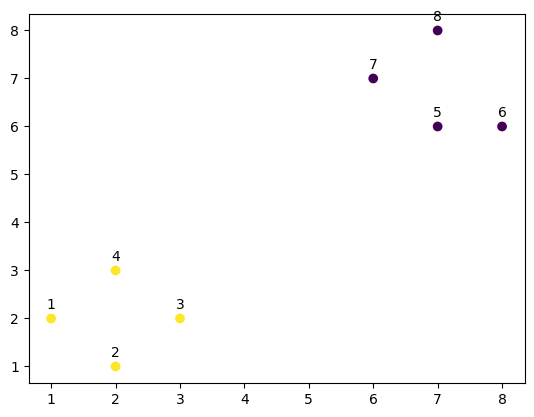

In [77]:
# Visualizando graficamente
fig, ax = plt.subplots()

ax.scatter(dados2.x,dados2.y,c=kmeans.labels_)

for i in range(0,len(dados)):
    ax.annotate(i+1,(dados.x[i],dados.y[i]),
                ha='center',
                xytext=(0,7),
                textcoords='offset points'
               )
    
plt.show()

In [78]:
# Calculando o silhouette_score PARA CADA UM DOS PONTOS
s_samples = metrics.silhouette_samples(dados2,kmeans.labels_)
s_samples

array([0.79117861, 0.79026043, 0.74353062, 0.74520588, 0.77160949,
       0.74826723, 0.73796406, 0.75984181])

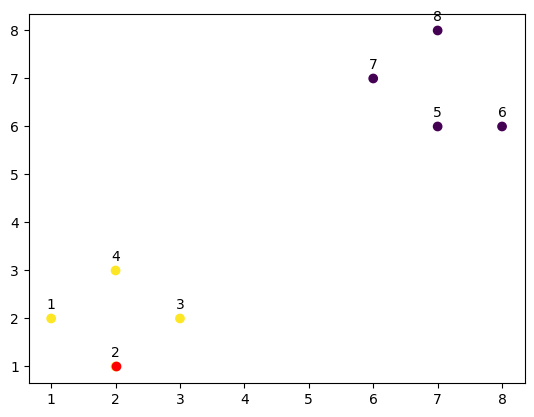

In [79]:
# Considerando o primeiro ponto dessa lista
fig, ax = plt.subplots()

ax.scatter(dados2.x,dados2.y,c=kmeans.labels_)
ax.scatter(2,1,c='r')

for i in range(0,len(dados)):
    ax.annotate(i+1,(dados.x[i],dados.y[i]),
                ha='center',
                xytext=(0,7),
                textcoords='offset points'
               )
    
plt.show()

In [80]:
# Podemos adicionar o label nesses DataFrame
dados2['label'] = kmeans.labels_

In [81]:
# Visualizando
dados2

,x,y,label
0,1,2,1
1,2,1,1
2,3,2,1
3,2,3,1
4,7,6,0
5,8,6,0
6,6,7,0
7,7,8,0


In [82]:
# Considerando todos os dados que estão no mesmo cluster do ponto vermelho
dados2[dados2.label == 1]

,x,y,label
0,1,2,1
1,2,1,1
2,3,2,1
3,2,3,1


In [83]:
# E os dados que estão no outro cluster
dados2[dados2.label == 0]

,x,y,label
4,7,6,0
5,8,6,0
6,6,7,0
7,7,8,0


In [84]:
# Selecionando o ponto vermelho
x_ponto = dados2.iloc[1,0]
y_ponto = dados2.iloc[1,1]

In [85]:
# Podemos calcular as distâncias de cada um dos pontos da mesma classe
valores_a = []

for i in [0,2,3]:
    x_i = dados2.iloc[i,0]
    y_i = dados2.iloc[i,1]
    distancia = ((x_ponto-x_i)**2+(y_ponto-y_i)**2)**(1/2)
    valores_a.append(distancia)
    print(distancia)

1.4142135623730951
1.4142135623730951
2.0


In [86]:
# E usar o numpy para fazer a média dessa lista
import numpy as np
a = np.mean(valores_a)
a

1.6094757082487299

In [87]:
# Então podemos calcular a distância aos pontos de classes diferentes
valores_b = []

for i in [4,5,6,7]:
    x_i = dados2.iloc[i,0]
    y_i = dados2.iloc[i,1]
    distancia = ((x_ponto-x_i)**2+(y_ponto-y_i)**2)**(1/2)
    valores_b.append(distancia)
    print(distancia)

7.0710678118654755
7.810249675906654
7.211102550927978
8.602325267042627


In [88]:
# E também calcular essa média
b = np.mean(valores_b)
b

7.673686326435684

In [89]:
# O máximo entre a e b é dado por
max(a,b)

7.673686326435684

In [90]:
# Calculando s
s = (b-a)/max(a,b)
s

0.790260425070527

In [91]:
# Agora utilizando o silhouette_samples para visualizar o resultado novamente
s_samples[1]

0.790260425070527

In [ ]:
# Tirando a média do array

In [ ]:
# Agora calculando o silhouette_score

In [ ]:
# Podemos visualizar o silhouette_score para diferentes valores de K

In [ ]:
# E traçar esse gráfico

- **Também podemos traçar o gráfico de silhueta utilizando a silhueta de cada ponto de dado**
    - https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

In [ ]:
# Considerando um valor de K

In [ ]:
# Podemos adicionar o valor do silhouette_score para cada um dos pontos no nosso DataFrame

In [ ]:
# E então ordenar os dados de acordo com o label e o silhouette_score

In [ ]:
# Visualizando essa tabela

In [ ]:
# Para visualizar as cores, podemos utilizar o nipy_spectral do matplotlib

In [ ]:
# E agora traçar o gráfico do silhouette_score junto ao gráfico dos pontos para melhorar a visualização

- Podemos fazer o mesmo para o dataset iris

In [ ]:
# Considerando qualquer valor de K

In [ ]:
# Adicionando o valor do silhouette_score para cada um dos pontos no nosso DataFrame

In [ ]:
# Ordenando os dados

In [ ]:
# Selecionando as cores

In [ ]:
# E agora traçando esses gráficos

- Se quiser podemos colocar tudo isso em um único gráfico, apesar de que isso pode gerar muita poluição visual

In [ ]:
# Criando o kmeans para k = 2

In [ ]:
# Criando o kmeans para k = 3

In [ ]:
# Criando uma figura com 2 linhas e 2 colunas